In [13]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
network = pypsa.Network()

# add high voltage bus
network.add("Bus", "HVB", v_nom = 11.0)

# add low voltage buses
for i in range(1,4):
    network.add("Bus", f"LVB0{i}", v_nom = 0.4)

# add distribution lines between the low voltage buses
network.add("Line", "Line12", bus0 = "LVB01", bus1 = "LVB02", r = 0.082, x = 0.07,
             length = 0.3)
network.add("Line", "Line13", bus0 = "LVB01", bus1 = "LVB03", r = 0.082, x = 0.07, 
            length = 0.4)

# add a transformer between HVB and LVB01
network.add("Transformer", "T", bus0 = "HVB", bus1 = "LVB01", model = "t", s_nom = 0.25,
            r = 0.5, x = 0.5)


# add loads to low voltage buses
network.add("Load", "Load02", bus = "LVB02", p_set = 0.1, q_set = 0.04)
network.add("Load", "Load03", bus = "LVB03", p_set = 0.1, q_set = 0.05)

# connect an external grid to HVB - Generator modelled as an external grid
network.add("Generator", "External Grid", bus = "HVB", control = "Slack")

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


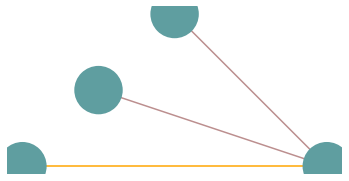

In [3]:
network.plot()
plt.show()

In [4]:
network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
HVB,11.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
LVB01,0.4,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
LVB02,0.4,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
LVB03,0.4,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


In [5]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
Line12,LVB01,LVB02,,0.07,0.082,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line13,LVB01,LVB03,,0.07,0.082,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
Load02,LVB02,,,0.1,0.04,-1.0
Load03,LVB03,,,0.1,0.05,-1.0


In [8]:
network.generators

attribute,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
External Grid,HVB,Slack,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [9]:
network.transformers


attribute,bus0,bus1,type,model,x,r,g,b,s_nom,s_nom_mod,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Transformer,,,,,,,,,,,,,,,,,,,,,
T,HVB,LVB01,,t,0.5,0.5,0.0,0.0,0.25,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
INFO:pypsa.pf:Newton-Raphson solved in 98 iterations with error of nan in 0.670104 seconds


{'n_iter': SubNetwork   0
 snapshot      
 now         98,
 'error': SubNetwork   0
 snapshot      
 now        NaN,
 'converged': SubNetwork      0
 snapshot         
 now         False}

In [12]:
# bus voltage magnitudes after load flow
network.buses_t.v_mag_pu

Bus,HVB,LVB01,LVB02,LVB03
snapshot,,,,
now,1.0,NaN,NaN,NaN


In [15]:
# bus voltage angles after load flow
network.buses_t.v_ang*180/np.pi

Bus,HVB,LVB01,LVB02,LVB03
snapshot,,,,
now,0.0,NaN,NaN,NaN


In [16]:
network.lines_t.p0

,Line12,Line13
snapshot,,
now,NaN,NaN
